<center>
  <h2>Assignment 3</h2>


<b>Name:  Maulik Rajpara </b><br/>
  <b>SID:200401712 &nbsp;
Email:mbr786@uregina.ca</center>

##Part A: Choosing the dataset
<p align="justify">
There is numerous financing company which provides home loans to the people and also for some other purposes like business, purchasing cars and education, etc. Among this, some big companies will have braches set all over urban and rural areas. Normally this process is done manually whenever clients apply for the loan. But checking clients eligibility depending on their information takes a lot of time. So we will try to make this process automatic using the model created through machine learning.</p>
  
 <p align="justify">The chosen dataset contains many valuable features that are considered while checking the eligibility of the customers(Kaggle.com, 2019). Any Bank or financial company try to ensure that the client will be able to pay loan EMI money on time to time. the dataset already has these criteria like the income of the client,  credit history, loan amount and many more. which makes this dataset more suitable for making an accurate prediction about the client's loan application.moreover, this dataset has enough information to make suitable model.Also,it is preoragnized so will require less work for fromating the data comapred to any web scarpped dataset. This prediction  of model will be either cliets gets approved or not approved and this type of problem can be easliy solved by any classification methods.</p>
 
  

<h2><b>Part B: Obtaining Dataset</b></h2> 
<p align="justify">
 
The chosen dataset is already in CSV file format. However, google colab does not support any direct file access from the local machine. But, with help to google drive, this file can be accessed into google colab. So packages for importing file from google drive is used. Also, pandas will be used to access and manipulate the CSV file.

In [0]:
from google.colab import drive
from google.colab import files
import pandas as pd
import io
drive.mount('/content/drive')
new_upload=files.upload()

input_File = pd.read_csv(io.BytesIO(new_upload['train.csv']))
print("The total No of Cloumns and rows:  {}".format(input_File.shape))
#duplicate
data_set=input_File.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving train.csv to train (2).csv
The total No of Cloumns and rows:  (614, 13)


<h2><b>Part C: Scrubbing & Formatting</b></h2> 
<p align="justify">
  The dataset displays wide varity of the fetures that play major role while predicting the outcome of the loan aplication like applicant income,education ,property area and many more.we can see that dataset's all features are properly catregarized into their suitable data types.So thier is no need to perform any operation for restructring information into data frame. 
  

In [0]:
data_set.columns.to_series().groupby(data_set.dtypes).groups


{dtype('int64'): Index(['ApplicantIncome'], dtype='object'),
 dtype('float64'): Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History'],
       dtype='object'),
 dtype('O'): Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'Property_Area', 'Loan_Status'],
       dtype='object')}

<p align="justify">For this instance there is no un-usual information is found in the data frame. However, this thing will be analyzed in detail after performing some data analysis on the dataset's information.

In [0]:
data_set.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


<h2><b>Part D: Exploratory Data analysis</b></h2> 
<p align="justify">
  

<p align="justify">Normally anyone one can go for assumption for creating the model for the prediction.But, it may result in affecting the overall accuracy of the model. So with help exploratory data analysis, we can find any pattern or useful feature that will have more impact on decision carried out by the model and will minimize the possibility of trying any other prediction methods. All the necessary packages for doing analysis is imported like pyplot and seaborn.This will be used to plot different types of charts. On first glance, we can see that some of the features have missing values. But that issue will be solved be later because there might be a possibility that one or two columns get eliminated if they are not helpful to make the decision.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


<p align="justify">
 There are a few columns which have only numeric data. So, first we will try to find any beneficial information from some statistical operation.




In [0]:
data_set.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:

data_set['Gender'].value_counts()


Male      489
Female    112
Name: Gender, dtype: int64

<p align="justify">Here all the features are plotted to their distinct value in the form of the bar chart. Upon reviewing this chart it is observed that most of the applicant is male. Also, almost all the applicant chooses to go with a loan term of 360 months. However, this information doesn't help to find a strong point for loan getting approved or not. So, there is a need for plotting other types of chart for getting a different angle at dataframe. 

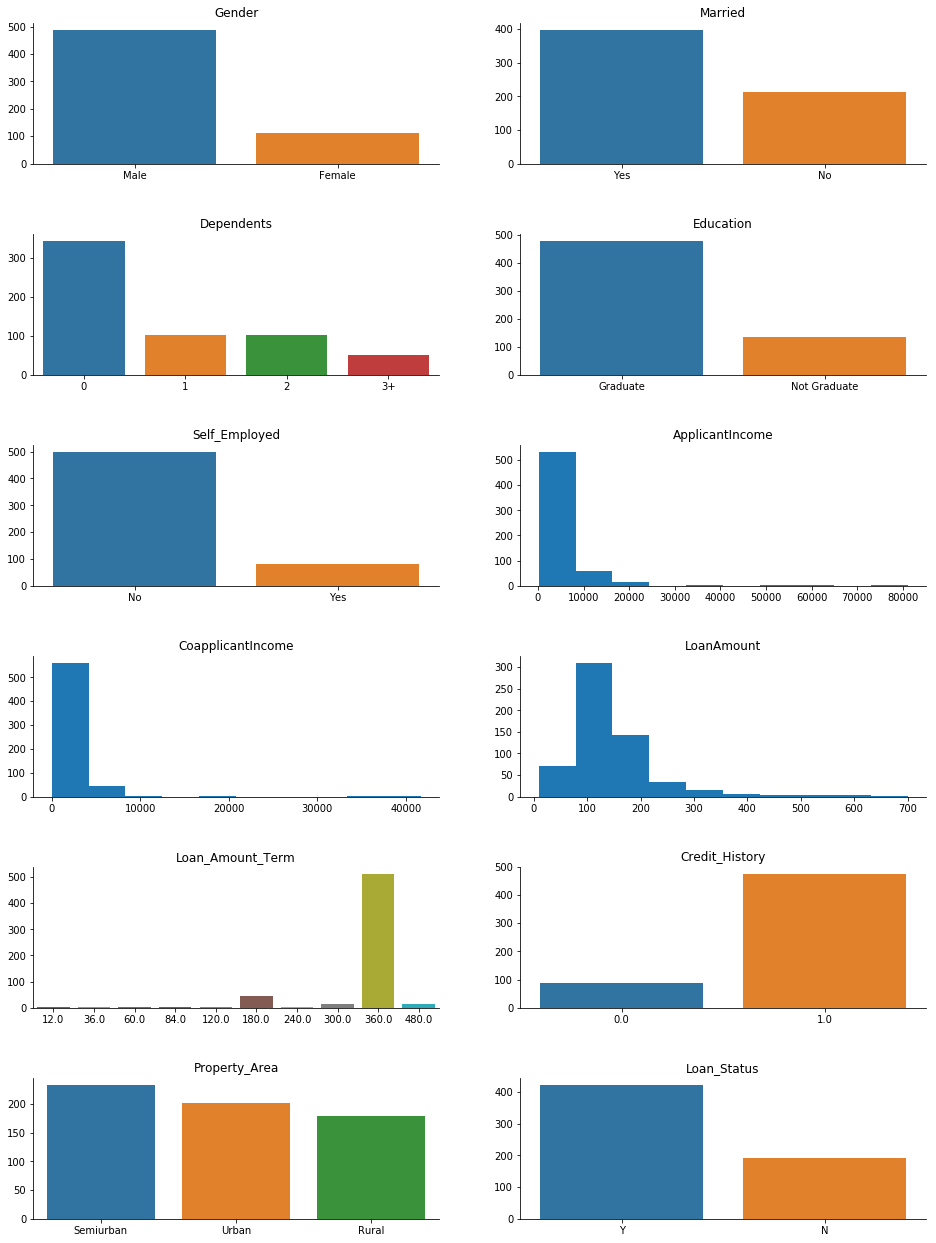

In [0]:

x_axis, y_axis = 0, 0
no_use, all_axis = plt.subplots(6, 2, figsize = (16, 22))
plt.subplots_adjust(hspace = .50)

for title in data_set.columns[1:]:
    if title in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
        all_axis[x_axis,y_axis].hist(data_set[title].dropna())
    else:
        bar_data = data_set[title].value_counts()
        sns.barplot(bar_data.index, bar_data.values, ax = all_axis[x_axis,y_axis])
    all_axis[x_axis, y_axis].set_title(title)
    all_axis[x_axis, y_axis].spines['top'].set_visible(False)
    all_axis[x_axis, y_axis].spines['right'].set_visible(False)
    y_axis += 1 
    if y_axis ==2:
        x_axis += 1
        y_axis = 0

<p align="justify">Here we tried to explore data with a different approach. Which is if the high value of loan amounts affect the decision or not. Here it can be observed that if the loan amount is higher than the getting positive response for a loan application gets maximized. But still, it's not full-proof.

In [0]:
data_set[data_set['LoanAmount'] > 500 ].sort_values(by = 'ApplicantIncome')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y


<p align="justify">
  Now, A unusual approach is tried to find any pattern between loan status and clients income. Here in the chart, we tried to obtain a pattern like clients income is above a certain range then their loan will be surely approved.  Unluckily this distribution chart unable to provide separate loan status only based on income to customers. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


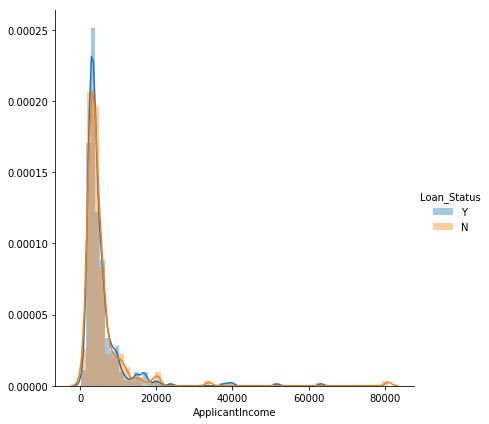

In [0]:
sns.set_style=("whitegrid");
sns.FacetGrid(data_set,hue="Loan_Status",size=6).map(sns.distplot,"ApplicantIncome").add_legend();
plt.show();

<p align="justify">
  In the below chart it tries to separate loan status depending on the income as well on the applicant's credit history. It is observed that application having income less than 19,000 and with bad credit history are getting rejected.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


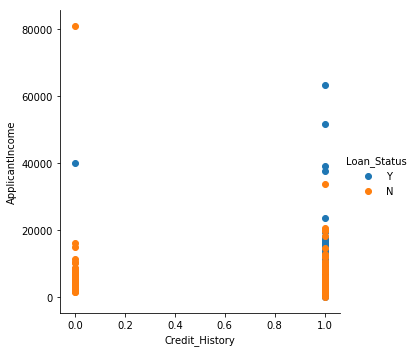

In [0]:
sns.set_style=("whitegrid");
sns.FacetGrid(data_set,hue="Loan_Status",size=5)\
.map(plt.scatter,"Credit_History","ApplicantIncome")\
.add_legend();
plt.show();

<p align="justify">
All the above charts still do not convey good information on how the decision on the loan application is decided. So here co-relation between different features is plotted.so we can have an idea which types of features have more impact on the decision. As a plotting shows that loan amount and co-applicant income also affect the loan status.And also it co-related with credit history.

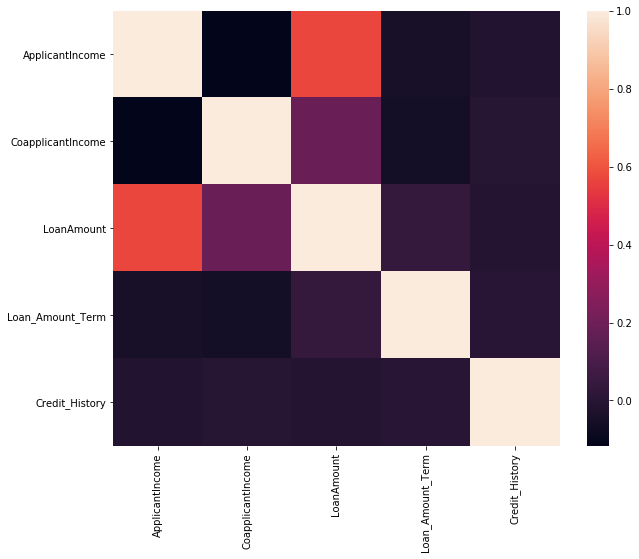

In [0]:
f = plt.subplots(1, 1, figsize = (10,8))
corr = data_set.corr()
sns.heatmap(corr)








<h2><b>Part E: Report Initial Findings</b></h2> 
<p align="justify"> Considering all the above graphs and charts it is understandable that for sure some patterns in the data frame where loan status is affected by the applicant's income their credit history and loan amount. This might be the actual factors which obtain the accurate prediction for loan getting approved or rejected.
  Considering different machine learning models this prediction can be accurately predicted by one of the classification algorithms like random forest classification, logistic regression or k-means. This algorithm is more used with similar kind of problem. So,there is no risk for creating a prediction model using the above-mentioned algorithm which will decide the loan application's outcome. This will ultimately help much financial organization to decrease their work and processing time.

###References



Kaggle.com. (2019). loanpred. [online] Available at: https://www.kaggle.com/uttam96/loanpred [Accessed 21 Aug. 2019].